# Classification Problem.

# Heart Disease Analysis

**About the datset**


**This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.**

$1.age$

$2.sex$

$3.chest pain type (4 values)$

4.resting blood pressure

5.serum cholestoral in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14.The names and social security numbers of the patients were recently removed from the database, replaced        with dummy values.


In [1]:
#import the needed packages which are going to helps us to predict the wheter or not a person has heart disease

#import basic packages for data analysis..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import the package for building and Evaluating the model..
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve


#Note : The current version of %matplotlib inline is no need anymore so you can use without this magic function.

In [2]:
# let us import our data and get familiar with that 
df=pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape
#the shape works in like (rows and columns)

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

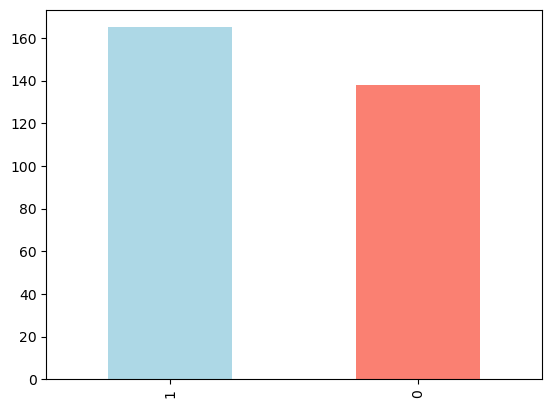

In [7]:
#Representation of Heart disease.
df['target'].value_counts().plot(kind='bar',color=['lightblue','salmon']);

<AxesSubplot:xlabel='target', ylabel='count'>

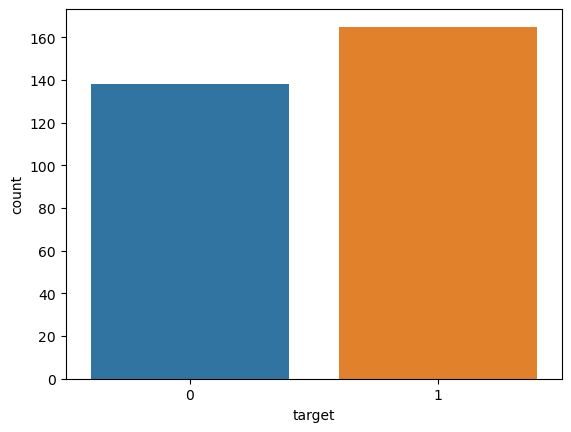

In [76]:
sns.countplot(x=df['target'].index,data=df['target'])

In [77]:
df.target.index

RangeIndex(start=0, stop=303, step=1)

In [11]:
df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#Lets us compare each columns with the target to get some knowlege about this
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
#so there are 96-female and 207 male
# let us compare the sex column with the target

pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


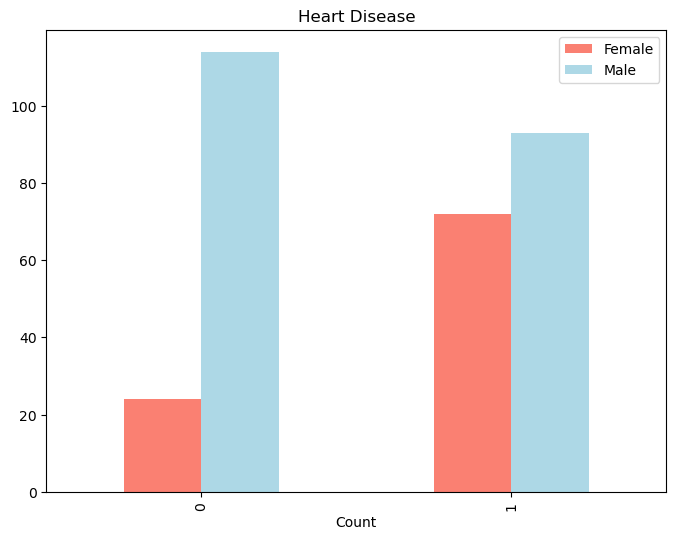

In [16]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(8,6),
                                  color=['salmon','lightblue'])
plt.title("Heart Disease")
plt.xlabel("Count")
plt.legend(['Female',"Male"])

In [23]:
df.pivot_table('target','age')


,target
age,
29,1.000000
34,1.000000
35,0.500000
37,1.000000
38,0.666667
39,0.750000
40,0.333333
41,0.900000
42,0.875000


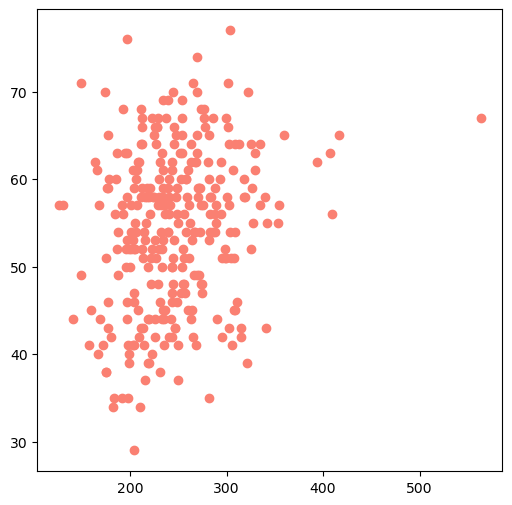

In [24]:
plt.figure(figsize=(6,6))

plt.scatter(df.chol,df.age,c='salmon');

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


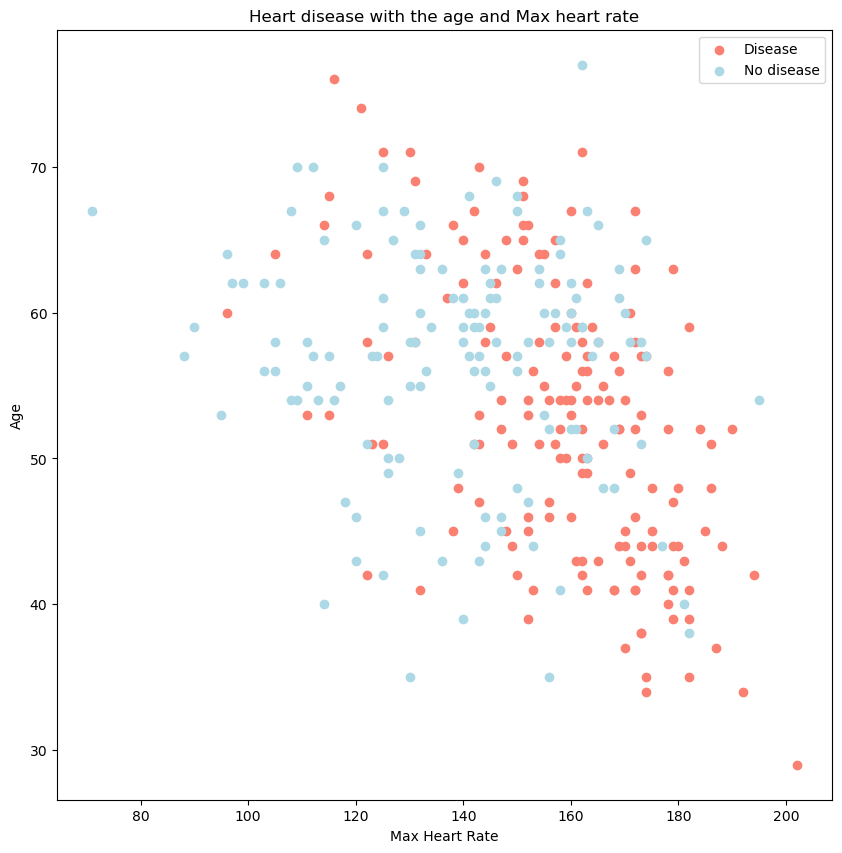

In [26]:
#let us compare some of the metrics to the target and get some insights
plt.figure(figsize=(10,10),edgecolor='lightblue')

#let us plot the thalach or the max heart rate to the age so that we get clear about the heart beat .

#this is the positive scatter or the heart disease affected person records.
plt.scatter(df.thalach[df.target==1],
           df.age[df.target==1],
           c='salmon')

#let us plot the negative graph too.
plt.scatter(df.thalach[df.target==0],
           df.age[df.target==0],
           c='lightblue')

plt.title('Heart disease with the age and Max heart rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Age')
plt.legend(['Disease','No disease'])

In [27]:
# we need to see some of the features that are the major cause for the heart disease and plot them to bring the ideas.

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


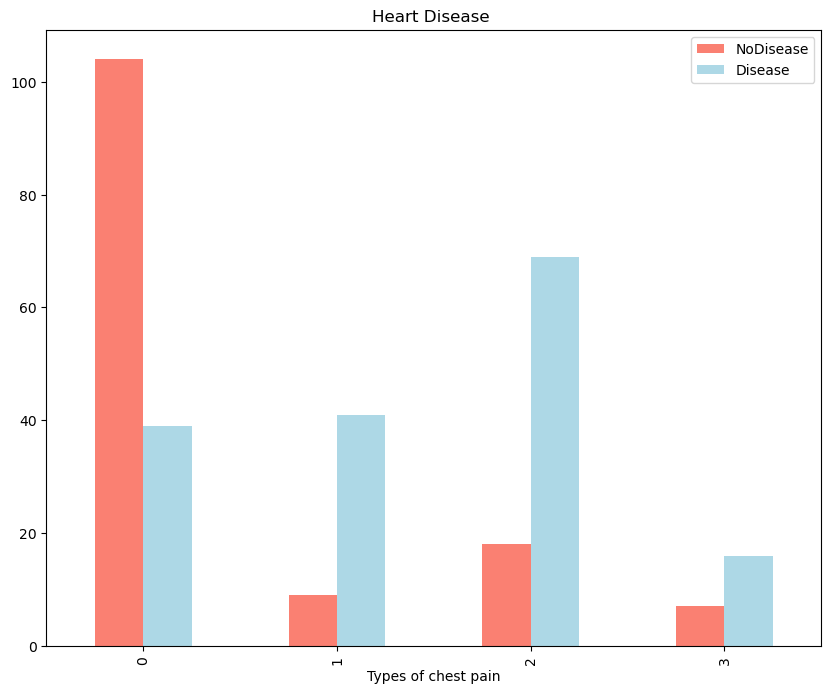

In [28]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,8),color=['salmon','lightblue'])
plt.xlabel("Types of chest pain")
plt.title("Heart Disease ")
plt.legend(["NoDisease","Disease"])

In [29]:
df.corr()
# so this is a correlation table to find the patterns inbetween the each independant variable and find the trend

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Seaborn Heat Map For Corrleation Analysis

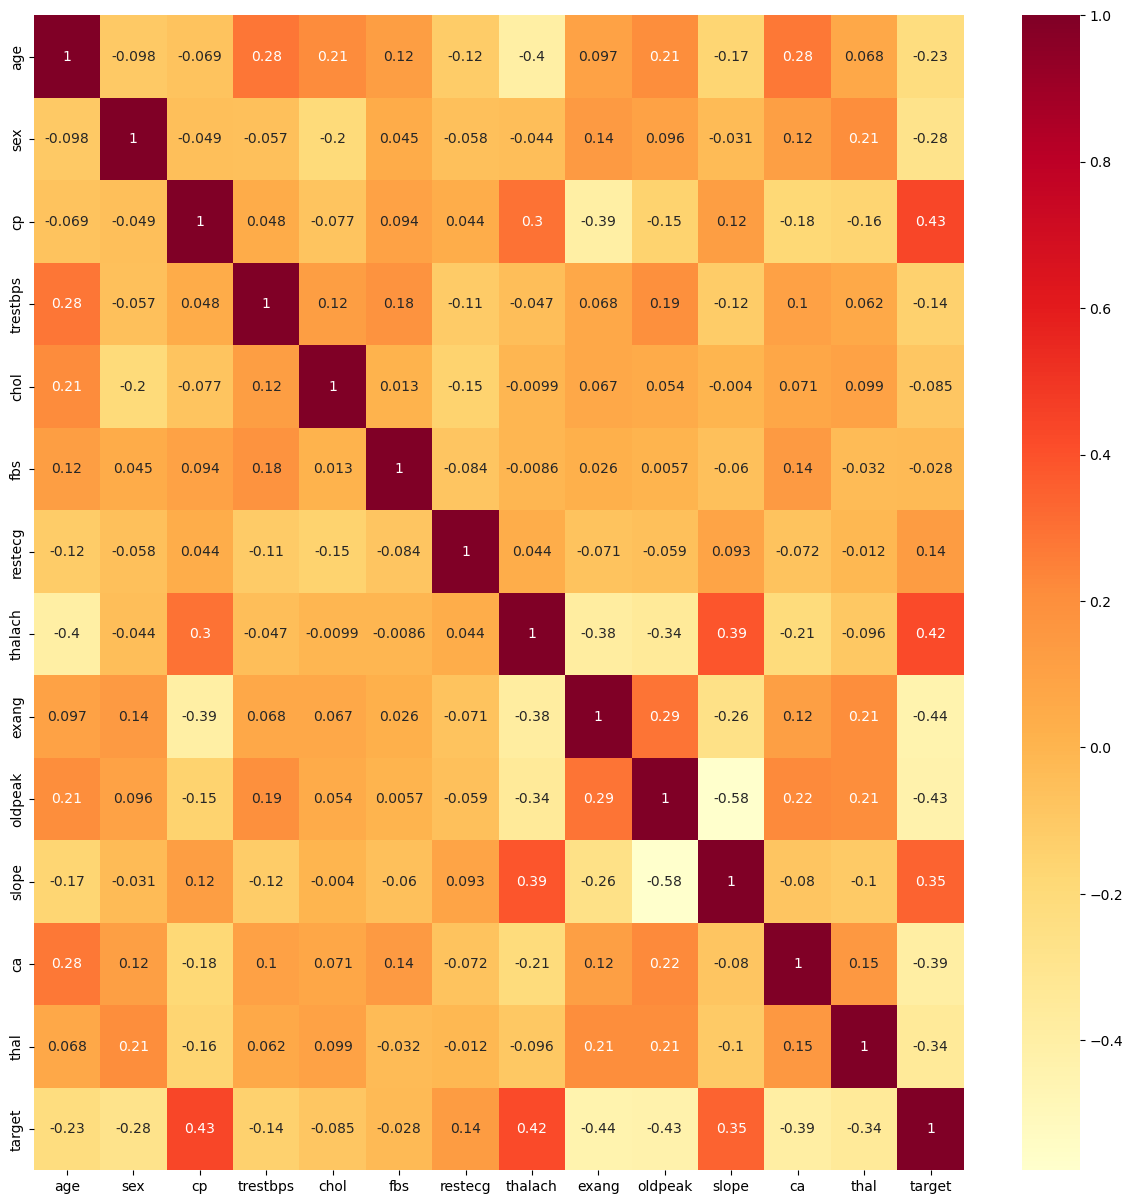

In [34]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')


In [35]:
# so let us find the correlation between the independant and the target variable.


# Building model

## Baseline model.

In [36]:
#spliting the dataset into x frame and y frame.
x=df.drop('target',axis=1)
y=df.target

#let us split the data into training and testing part.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#initialize the model variable 
model=RandomForestClassifier(n_estimators=100,max_features='sqrt')

#fit the model for the training the dataset.
model.fit(x_train,y_train)


RandomForestClassifier()

In [37]:
model.score(x_test,y_test)

0.819672131147541

In [38]:
print(f'The model prediction percentage is:{model.score(x_test,y_test)*100:.2f}%')

The model prediction percentage is:81.97%


# Hyper parameters

In [39]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
# so let us try to create the same baseline model with the KNeighbors Algorithm of Machine learning

# to make the code formal let us split the data set again
x=df.drop('target',axis=1)
y=df.target

# separate the samples as training and the testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#initialize the K_model to predict the value using the neighbour algorithm.
K_model=KNeighborsClassifier()

K_model.fit(x_train,y_train)


KNeighborsClassifier()

In [41]:
K_model.score(x_test,y_test)

0.6229508196721312

In [42]:
print(f'The baseline prediction of the neighbours algorithm is{K_model.score(x_test,y_test)*100:.2f}%')

The baseline prediction of the neighbours algorithm is62.30%


In [43]:
# so we do often consider the RandomForestClassifier as the war horse of the machine learning models.

# we can also tune some of the hyperparameters of the neighbours algorithm and make them to predict well and good

K_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
# let us initialize this again
K_model=KNeighborsClassifier(leaf_size=25)

In [45]:
#KNeighbours Algorithm.to predict the heart disease analysis
K_model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=25)

In [46]:
print(f'The baseline prediction of the neighbours algorithm is{K_model.score(x_test,y_test)*100:.2f}%')

The baseline prediction of the neighbours algorithm is62.30%


In [47]:
#let us try to train the model with Logistic Regression.
model=LogisticRegression()

model.fit(x_train,y_train)

model.score(x_test,y_test)

/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8032786885245902

In [48]:
#so we got a very descent amount of prediction score then we need to proceed and evaluate the model again to make it as a very good evaluation model...

#before let us create a dictionary of function so we could get them easily in hand.
models={
    "Logistic_Regression":LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNN':KNeighborsClassifier()
}

def fit_and_score(x_train,y_train,x_test,y_test,models):
    """
    This section is used to fit and score the model which takes
    x_train:features training set
    y_train:target variable training set
    x_test:features testing set
    y_test:target testing set
    """
    # let us set the random seed so that the results are reproducible
    np.random.seed(42)
    
    #let create a dictionary to store the scores
    model_score={}
    
    #here we are accesing the items in the models dictionary.
    for names,model in models.items():
        #fit the data
        model.fit(x_train,y_train)
        
        # we are fitting and scoring the values and appending to the dictionary.
        model_score[names]=model.score(x_test,y_test)
    return model_score


In [49]:
#here let us split the data so we are in the workflow 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
model_score=fit_and_score(x_train,y_train,x_test,y_test,models)
model_score

/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic_Regression': 0.8688524590163934,
 'RandomForestClassifier': 0.8688524590163934,
 'KNN': 0.639344262295082}

In [51]:
model_scores=pd.DataFrame(model_score,index=['accuracy'])
model_scores

,Logistic_Regression,RandomForestClassifier,KNN
accuracy,0.868852,0.868852,0.639344


<AxesSubplot:>

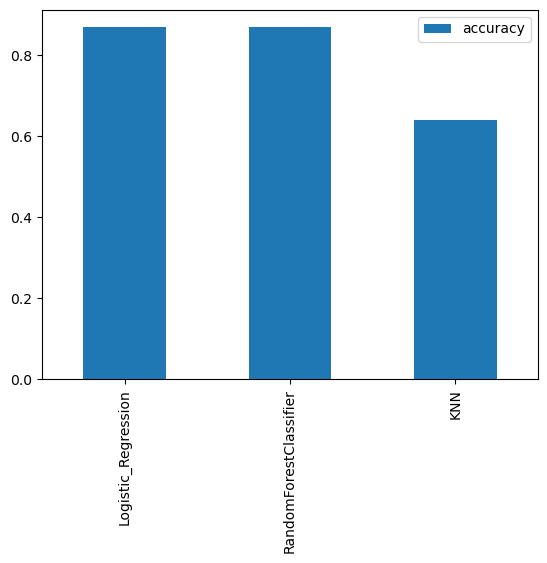

In [52]:
model_scores.T.plot(kind='bar')

In [53]:
#by this we may conclude that logistic regression is good enough to make some predictions and k neighbours is the worst case so we neglet the neighbours algorithm and proceed with the other 


# Hyperparameter tuning for K-Neighbours Classifier

In [54]:
#let us try to tune the knn model.
train_score=[]
test_score=[]



for i in range(1,20,1):
    
    np.random.seed(42)
    knn=KNeighborsClassifier(n_neighbors=i)
    #let us fit the model
    knn.fit(x_train,y_train)
    
    # let us update the socre of the training data and the testing data.
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
    
print(train_score)

print("The test scores are:")
print(test_score)

[1.0, 0.7892561983471075, 0.8016528925619835, 0.7644628099173554, 0.7520661157024794, 0.7479338842975206, 0.743801652892562, 0.7355371900826446, 0.743801652892562, 0.7272727272727273, 0.731404958677686, 0.731404958677686, 0.7231404958677686, 0.7107438016528925, 0.71900826446281, 0.7024793388429752, 0.7066115702479339, 0.71900826446281, 0.7024793388429752]
The test scores are:
[0.5901639344262295, 0.5081967213114754, 0.5737704918032787, 0.5901639344262295, 0.639344262295082, 0.5901639344262295, 0.639344262295082, 0.6229508196721312, 0.6229508196721312, 0.5737704918032787, 0.6065573770491803, 0.639344262295082, 0.639344262295082, 0.6229508196721312, 0.639344262295082, 0.6229508196721312, 0.6065573770491803, 0.6229508196721312, 0.6721311475409836]


maximum value of the test score is:67.21%


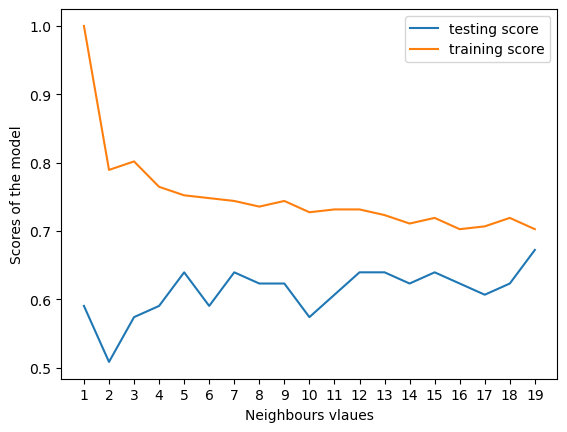

In [55]:
#it is complet mess and figuring out the best is difficult let us see another way or plot it 
plt.plot(range(1,20,1),test_score)
plt.plot(range(1,20,1),train_score)
plt.legend(['testing score','training score'])
plt.xlabel('Neighbours vlaues')
plt.ylabel('Scores of the model')
plt.xticks(range(1,20,1));
print(f'maximum value of the test score is:{max(test_score)*100:.2f}%')

# RandomizedSearchCV

**let us tune the model's using grid and adjust the hyper parameters with this ''**

In [56]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
lr_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [58]:
# let us begin with random seed
np.random.seed(42)

#create the random parameter
lr_model=RandomizedSearchCV(LogisticRegression(),
                           param_distributions=lr_grid,
                           cv=5,
                           verbose=True,
                            n_iter=20
                           )

lr_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
lr_model.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [60]:
lr_model.score(x_test,y_test)

0.8688524590163934

In [61]:
# let us do this for RandomForest Classifier
np.random.seed(42)

rf_model=RandomizedSearchCV(RandomForestClassifier(),
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           param_distributions
                            =rf_grid)

rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [62]:
rf_model.score(x_test,y_test)

0.8360655737704918

In [63]:
rf_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [64]:
lr_gs_grid={
    "C":np.logspace(-5,5,50),
    "solver":['liblinear']
}

In [65]:
np.random.seed(42)
lr_gs_model=GridSearchCV(estimator=LogisticRegression(),
                        verbose=True,
                         cv=5,
                         param_grid=lr_gs_grid
                        )
lr_gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
lr_gs_model.best_params_

{'C': 0.7906043210907702, 'solver': 'liblinear'}

In [78]:
lr_gs_model.score(x_test,y_test)

0.8688524590163934

In [79]:
y_pred=lr_gs_model.predict(x_test)

In [80]:
#oh my goodness the model has reached 90% from tuning it is a good newss!!

#so now let us evaluate the model...

# Evaluation of the model

/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


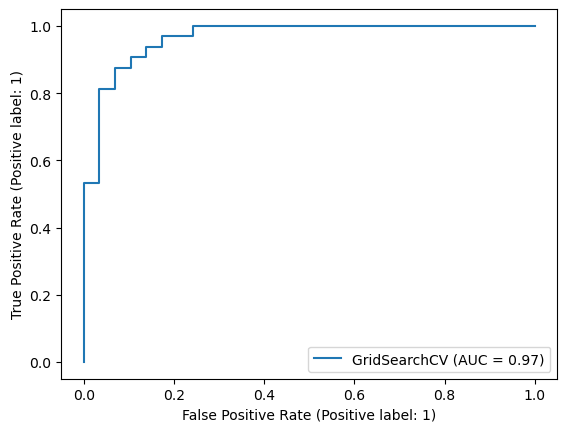

In [81]:
plot_roc_curve(lr_gs_model,x_test,y_test)

**The ideal roc curve has the value of 1.0 auc but our model does pretty well and we do have 0.96 so there is many possiblity to have better prediction for this classification model**

# Confusion matrix

In [82]:
print(confusion_matrix(y_test,y_pred))

[[22  7]
 [ 1 31]]


/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


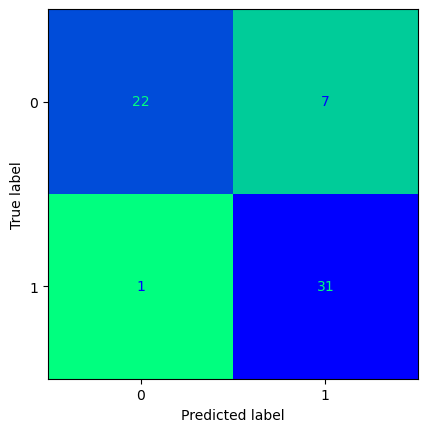

In [83]:
#let us jump into plotting the roc curve 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_gs_model,x_test,y_test,colorbar=False,cmap='winter_r');

In [84]:
#we need to see about the classification reprot to find how well our model is performing 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        29
           1       0.82      0.97      0.89        32

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.88      0.87      0.87        61



In [85]:
#let us do this for 5 fold classification model.

# Cross Val Score

In [86]:
clf=LogisticRegression(C=3.2374575428176464,solver='liblinear')

In [87]:
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='accuracy')

cv_acc=np.mean(cv_acc)

In [88]:
cv_acc

0.8248633879781421

In [89]:
#let us do this for the precision value.
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='precision')

cv_precision=np.mean(cv_precision)

In [90]:
cv_precision

0.8188009641520078

In [91]:
#now this for recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='recall')

cv_recall=np.mean(cv_recall)

In [92]:
cv_recall

0.8787878787878787

In [93]:
#let us also check for the f1 score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring='f1')

cv_f1=np.mean(cv_f1)

In [94]:
cv_f1

0.8464039460644465

In [95]:
heart_disease_vals=pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1_score":cv_f1
},index=[0])

<AxesSubplot:>

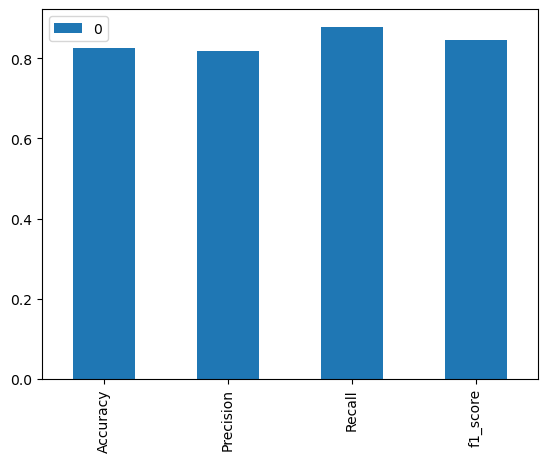

In [96]:
heart_disease_vals.T.plot(kind='bar',)